In [1]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import fashion_mnist
#from keras.callbacks import TensorBoard
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# import dataset
(x_train, _), (x_test, _)= fashion_mnist.load_data()

# data preprocessing
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [3]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

hidden_1 = Dense(32, activation='relu')(encoded)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(hidden_1)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics =['accuracy'])

In [4]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [5]:
#history = autoencoder.fit(x_train, x_train, epochs=5, batch_size=256, shuffle=True, verbose=0, validation_data=(x_test, x_test))
history = autoencoder.fit(x_train, x_train, batch_size=256, epochs=25, verbose=2,  validation_data=(x_test, x_test))

Epoch 1/25
235/235 - 2s - loss: 0.6927 - accuracy: 5.8333e-04 - val_loss: 0.6926 - val_accuracy: 5.0000e-04
Epoch 2/25
235/235 - 2s - loss: 0.6926 - accuracy: 6.0000e-04 - val_loss: 0.6925 - val_accuracy: 4.0000e-04
Epoch 3/25
235/235 - 2s - loss: 0.6925 - accuracy: 6.1667e-04 - val_loss: 0.6924 - val_accuracy: 4.0000e-04
Epoch 4/25
235/235 - 2s - loss: 0.6924 - accuracy: 5.8333e-04 - val_loss: 0.6923 - val_accuracy: 4.0000e-04
Epoch 5/25
235/235 - 2s - loss: 0.6923 - accuracy: 5.5000e-04 - val_loss: 0.6922 - val_accuracy: 5.0000e-04
Epoch 6/25
235/235 - 2s - loss: 0.6922 - accuracy: 5.8333e-04 - val_loss: 0.6921 - val_accuracy: 5.0000e-04
Epoch 7/25
235/235 - 2s - loss: 0.6921 - accuracy: 5.6667e-04 - val_loss: 0.6920 - val_accuracy: 4.0000e-04
Epoch 8/25
235/235 - 2s - loss: 0.6919 - accuracy: 6.0000e-04 - val_loss: 0.6919 - val_accuracy: 4.0000e-04
Epoch 9/25
235/235 - 2s - loss: 0.6918 - accuracy: 6.1667e-04 - val_loss: 0.6918 - val_accuracy: 3.0000e-04
Epoch 10/25
235/235 - 2s - l

## Question 2

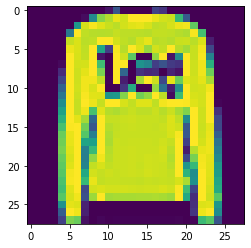

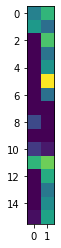

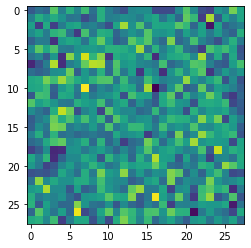

In [7]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

# predicting test data
prediction = autoencoder.predict(x_test[1].reshape(1,784))

# Original test data
plt.imshow(x_test[1].reshape(28,28))
plt.show()

#Bonus: Visualize the compressed version of the input data in the middle layer
plt.imshow(encoded_imgs[1].reshape(16,2))
plt.show()

# Prediction 
plt.imshow(prediction.reshape(28,28))
plt.show()

## Question 4

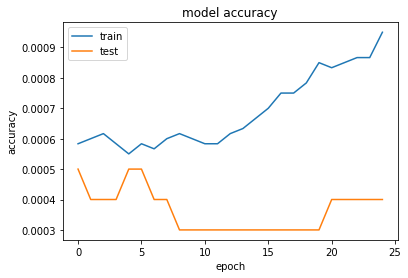

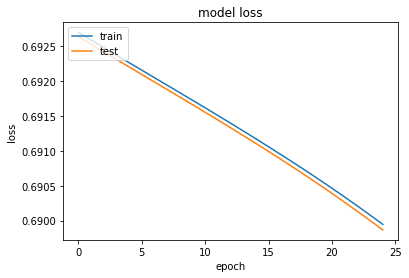

In [8]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()